# Set Up

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('FoodPrice_in_Turkey.csv')

In [3]:
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [5]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [ ]:
# Price
# mean = 15.7 -> giá trung bình là 15.7
# std = 22.4
  # -> Mức độ chênh lệch về giá của các sản phẩm so với giá trung bình là 22.4
  # -> Lệch: phân bổ về giá của các sản phẩm đang không đều (cái giá cao quá, cái giá thấp quá)
  # -> Đoán là dữ liệu này có outlier
  # Có sản phẩm có giá trị rất lớn so với phần còn lại

# min = 0.25 -> giá thấp nhất là 0.25
# 25% (Q1) = 3.22 -> 25% các sản phẩm có giá nhỏ hơn hoặc bằng 3.22
# 50% (Q2, median) = 5.9 -> 50% các sản phẩm có giá nhỏ hơn hoặc bằng 5.9
# 75% = 20.4 -> 75% các sản phẩm có giá nhỏ hơn hoặc bằng 20.4
# max = 159.4 -> giá cao nhất là 159.4

In [6]:
# Đếm
df.count()

Place          7381
ProductId      7381
ProductName    7381
UmId           7381
UmName         7381
Month          7381
Year           7381
Price          7381
dtype: int64

In [7]:
# Giá nhỏ nhất
df['Price'].min()

0.2539

In [8]:
# Giá cao nhất
df['Price'].max()

159.4458

In [10]:
# Giá trung bình
# .mean()
df['Price'].mean()

15.738708576073702

In [11]:
# Giá trung vị
df['Price'].median()

5.9096

In [12]:
# Mode
df['ProductName'].mode()

0                  Bananas - Retail
1            Beans (white) - Retail
2           Bread (common) - Retail
3                   Bulgur - Retail
4                Chickpeas - Retail
5           Cocoa (powder) - Retail
6                   Coffee - Retail
7                     Eggs - Retail
8             Fish (fresh) - Retail
9                   Garlic - Retail
10    Groundnuts (shelled) - Retail
11                 Lentils - Retail
12          Meat (chicken) - Retail
13           Meat (mutton) - Retail
14             Meat (veal) - Retail
15      Milk (pasteurized) - Retail
16             Oil (olive) - Retail
17         Oil (sunflower) - Retail
18                  Onions - Retail
19                   Pasta - Retail
20                    Rice - Retail
21                    Salt - Retail
22                   Sugar - Retail
23                     Tea - Retail
24                Tomatoes - Retail
25             Wheat flour - Retail
Name: ProductName, dtype: object

In [17]:
df.to_excel('FoodPrice_in_Turkey.xlsx')

In [13]:
# phương sai
# variance - var
df['Price'].var()

502.5794374448817

In [14]:
# Độ lệch chuẩn
# standard deviation -> std
df['Price'].std()

22.418283552602364

<Axes: xlabel='Price', ylabel='Count'>

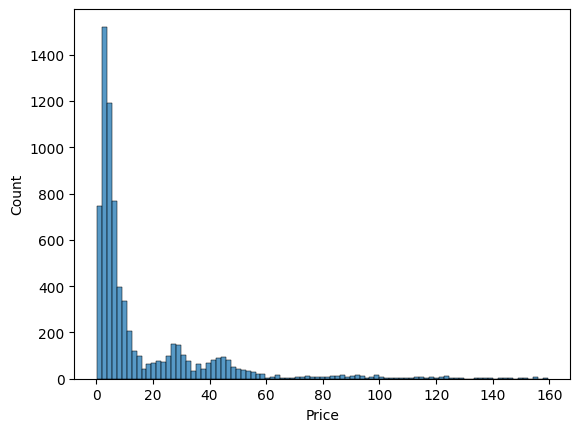

In [16]:
sns.histplot(df['Price'])

# Pivot Table

In [ ]:
# 1) df: chỉ định muốn áp hàm lên tập dữ liệu df
# 2) .pivot_table(): hàm dùng để tạo ra pivot table
# Sau bước 1 và 2 => df.pivot_table(): áp hàm pivot_table lên bảng df

# 3) Chỉ định hàng, cột, giá trị muốn tính, hàm toán tử (mean, sum, min, max, ...)
  # (1) Chỉ định giá trị mà mình muốn tính: values='Price'
  # (2) Chỉ định hàng: index='ProductName'
  # (3) Chỉ định cột: columns='Year'
  # (4) Chỉ định hàm mà mình muốn tính: aggfunc='mean'

In [18]:
df.pivot_table(values='Price', index='ProductName', columns='Year', aggfunc='mean')

Year,2013,2014,2015,2016,2017,2018,2019
ProductName,,,,,,,
Apples (red) - Retail,2.080950,2.410118,2.401417,2.428333,2.560000,NaN,NaN
Apples - Retail,NaN,NaN,NaN,NaN,3.334175,3.923417,4.259810
Bananas - Retail,4.002225,4.962827,5.368833,5.914167,7.313738,8.701475,10.879371
Beans (white) - Retail,6.932800,9.484309,7.288333,6.949167,9.217700,9.242844,11.658690
Bread (common) - Retail,2.853000,3.069491,2.982917,3.373333,4.178841,4.740619,5.513271
Bread (pita) - Retail,NaN,NaN,2.311429,2.440000,2.480000,NaN,NaN
Bulgur - Retail,2.405025,2.593791,2.680500,2.765833,3.293874,3.546027,4.369369
Cabbage - Retail,1.104800,1.073233,1.197000,1.375714,1.589495,1.751664,2.232738
Cauliflower - Retail,2.046950,2.129317,2.772800,2.655714,2.878481,3.237750,4.326537


In [19]:
# Tạo pivot table để tính giá trung bình của từng sản phẩm theo Place
df.pivot_table(values='Price', index = 'ProductName', columns = 'Place', aggfunc = 'mean')

Place,Ankara,Istanbul,Izmir,National Average
ProductName,,,,
Apples (red) - Retail,NaN,NaN,NaN,2.392193
Apples - Retail,3.713139,4.102853,3.829625,3.899292
Bananas - Retail,8.465103,9.100081,9.524569,6.907292
Beans (white) - Retail,9.239244,10.654164,10.536292,8.639444
Bread (common) - Retail,4.650436,5.128289,4.765864,3.833450
Bread (pita) - Retail,NaN,NaN,NaN,2.404545
Bulgur - Retail,3.599608,3.974369,3.752964,3.093000
Cabbage - Retail,1.678658,2.017100,1.929589,1.483169
Cauliflower - Retail,3.320982,4.064724,3.207771,2.890432


In [20]:
# Tạo pivot table để tính giá nhỏ nhất và lớn nhất của từng sản phẩm theo Place
df.pivot_table(values='Price',
               index='ProductName',
               columns='Place',
               aggfunc={'min','max'})

max            \
Place                                                 Ankara  Istanbul   
ProductName                                                              
Apples (red) - Retail                                    NaN       NaN   
Apples - Retail                                       5.0677    5.4152   
Bananas - Retail                                     11.9123   12.5669   
Beans (white) - Retail                               11.8752   13.0800   
Bread (common) - Retail                               5.7989    6.1942   
Bread (pita) - Retail                                    NaN       NaN   
Bulgur - Retail                                       4.8920    5.2611   
Cabbage - Retail                                      3.0083    3.2543   
Cauliflower - Retail                                  5.0407    5.9113   
Cheese - Retail                                      30.1573   32.8980   
Chickpeas - Retail                                   13.1585   14.8332   
Cocoa (powder) - Retail                              53.5391   54.8237   
Coffee (instant) - Retail                            42.9267   59.6586   
Coffee - Retail                                      49.2456   52.9151   
Cucumbers (greenhouse) - Retail                          NaN       NaN   
Cucumbers - Retail                                    6.5116    6.7150   
Eggplants - Retail                                    9.1737    9.5980   
Eggs - Retail                                         0.6817    0.8156   
Electricity - Retail                                  0.7102    0.7102   
Fish (fresh) - Retail                                34.8474   37.7223   
Fuel (gas) - Retail                                 106.0534  112.4568   
Fuel (petrol-gasoline) - Retail                     105.5797  111.2686   
Garlic - Retail                                      33.5643   41.7712   
Groundnuts (shelled) - Retail                        32.2711   36.0327   
Lentils - Retail                                      8.1537    8.3625   
Meat (chicken) - Retail                              14.4615   15.6383   
Meat (mutton) - Retail                               55.8038   58.8054   
Meat (veal) - Retail                                 47.4854   49.4000   
Milk (pasteurized) - Retail                           5.0322    5.3813   
Milk (powder, infant formula) - Retail              151.5234  155.8673   
Oil (olive) - Retail                                 32.3958   34.7226   
Oil (sunflower) - Retail                             10.3134   11.2261   
Onions - Retail                                       4.7882    6.2174   
Oranges - Retail                                      5.9456    6.8996   
Pasta - Retail                                        4.8037    5.0748   
Peas (green, dry) - Retail                               NaN       NaN   
Potatoes - Retail                                     4.9510    5.1602   
Rice - Retail                                         9.3269   10.2924   
Salt - Retail                                         2.4322    2.9118   
Spinach - Retail                                      5.1286    6.2915   
Sugar - Retail                                        5.1659    5.4158   
Tea (green) - Retail                                     NaN       NaN   
Tea (herbal) - Retail                                 5.8987    6.9347   
Tea - Retail                                         29.1799   33.2528   
Tomatoes (paste) - Retail                            10.5557   11.2803   
Tomatoes - Retail                                     6.4701    7.0440   
Transport (public) - Retail                           2.6938    2.3919   
Wage (non-qualified labour, non-agricultural) -...       NaN       NaN   
Water - Retail                                        7.4418    6.7888   
Wheat flour - Retail                                  3.5210    4.5670   
Yogurt - Retail                                       6.3523    6.7407   
Zucchini - Retail                                     6.8850 

In [21]:
# Tạo pivot table để tính giá nhỏ nhất và năm lớn nhất (năm gần nhất) của từng sản phẩm theo Place
df.pivot_table(values=['Price', 'Year'],
               index='ProductName',
               columns='Place',
               aggfunc={'Price':'min','Year':'max'})

Price                    \
Place                                                Ankara Istanbul    Izmir   
ProductName                                                                     
Apples (red) - Retail                                   NaN      NaN      NaN   
Apples - Retail                                      2.5062   2.7790   2.4769   
Bananas - Retail                                     5.5465   6.2111   6.5702   
Beans (white) - Retail                               7.1141   8.8738   8.2088   
Bread (common) - Retail                              3.7938   4.6163   3.8310   
Bread (pita) - Retail                                   NaN      NaN      NaN   
Bulgur - Retail                                      3.0782   3.3583   3.1762   
Cabbage - Retail                                     1.0872   1.3833   1.4143   
Cauliflower - Retail                                 1.8572   2.2645   1.8853   
Cheese - Retail                                     22.9312  21.7014  23.4353   
Chickpeas - Retail                                   7.4899   9.1283   9.2749   
Cocoa (powder) - Retail                             40.1098  41.9964  41.1896   
Coffee (instant) - Retail                           31.0769  43.7336  51.1247   
Coffee - Retail                                     39.5491  38.4978  39.2677   
Cucumbers (greenhouse) - Retail                         NaN      NaN      NaN   
Cucumbers - Retail                                   1.4804   1.8369   1.5805   
Eggplants - Retail                                   1.7673   2.3260   1.9382   
Eggs - Retail                                        0.3805   0.4072   0.3885   
Electricity - Retail                                 0.4118   0.4118   0.4118   
Fish (fresh) - Retail                               19.2014  22.0001  16.7551   
Fuel (gas) - Retail                                  6.9342   6.8276   6.9414   
Fuel (petrol-gasoline) - Retail                      5.0578   5.0180   5.0340   
Garlic - Retail                                      9.2014  13.0595  13.2170   
Groundnuts (shelled) - Retail                       17.0795  19.8768  19.2213   
Lentils - Retail                                     5.9932   6.4378   6.4651   
Meat (chicken) - Retail                              7.5591   8.6224   8.2383   
Meat (mutton) - Retail                              37.4201  41.3248  39.3927   
Meat (veal) - Retail                                38.4453  40.3347  40.8795   
Milk (pasteurized) - Retail                          2.9830   2.9293   3.0222   
Milk (powder, infant formula) - Retail              71.5771  75.3133  80.1899   
Oil (olive) - Retail                                26.3251  26.8817  27.3116   
Oil (sunflower) - Retail                             7.7660   8.3505   7.5109   
Onions - Retail                                      0.9607   1.1588   1.0259   
Oranges - Retail                                     2.1383   2.3705   2.0179   
Pasta - Retail                                       3.1416   3.0470   2.9633   
Peas (green, dry) - Retail                              NaN      NaN      NaN   
Potatoes - Retail                                    1.2560   1.5771   1.2421   
Rice - Retail                                        6.1241   6.6842   6.8621   
Salt - Retail                                        1.7389   1.9909   1.8987   
Spinach - Retail                                     2.0279   2.4959   1.9789   
Sugar - Retail                                       4.0830   4.3394   4.0385   
Tea (green) - Retail                                    NaN      NaN      NaN   
Tea (herbal) - Retail                                4.5829   4.3548   4.8263   
Tea - Retail                                        23.9197  25.0650  27.2518   
Tomatoes (paste) - Retail                            5.3686   5.5578   5.7609   
Tomatoes - Retail                                    1.8266   2.2394   1.8660   
Transport (public) - Retail                          2.2946   1.7041   2.8775   
Wage

In [ ]:
# Tính tổng giá và trung bình số tháng bán hàng của từng mặt hàng theo địa điểm
# giá: Price
# tháng: Month
# mặt hàng: ProductName
# địa điểm: Place

In [22]:
df.pivot_table(values=['Price', 'Month'],
               index='ProductName',
               columns='Place',
               aggfunc={'Price':'sum','Month':'mean'})

Month            \
Place                                                 Ankara  Istanbul   
ProductName                                                              
Apples (red) - Retail                                    NaN       NaN   
Apples - Retail                                     6.500000  6.500000   
Bananas - Retail                                    6.500000  6.500000   
Beans (white) - Retail                              6.500000  6.500000   
Bread (common) - Retail                             6.500000  6.500000   
Bread (pita) - Retail                                    NaN       NaN   
Bulgur - Retail                                     6.500000  6.500000   
Cabbage - Retail                                    6.421053  6.421053   
Cauliflower - Retail                                6.294118  6.294118   
Cheese - Retail                                     6.500000  6.500000   
Chickpeas - Retail                                  6.500000  6.500000   
Cocoa (powder) - Retail                             6.500000  6.500000   
Coffee (instant) - Retail                           7.071429  7.071429   
Coffee - Retail                                     6.500000  6.500000   
Cucumbers (greenhouse) - Retail                          NaN       NaN   
Cucumbers - Retail                                  6.500000  6.500000   
Eggplants - Retail                                  6.500000  6.500000   
Eggs - Retail                                       6.500000  6.500000   
Electricity - Retail                                6.500000  6.500000   
Fish (fresh) - Retail                               6.500000  6.500000   
Fuel (gas) - Retail                                 6.500000  6.500000   
Fuel (petrol-gasoline) - Retail                     6.500000  6.500000   
Garlic - Retail                                     6.500000  6.500000   
Groundnuts (shelled) - Retail                       6.500000  6.500000   
Lentils - Retail                                    6.500000  6.500000   
Meat (chicken) - Retail                             6.500000  6.500000   
Meat (mutton) - Retail                              6.500000  6.500000   
Meat (veal) - Retail                                6.500000  6.500000   
Milk (pasteurized) - Retail                         6.500000  6.500000   
Milk (powder, infant formula) - Retail              6.500000  6.500000   
Oil (olive) - Retail                                6.500000  6.500000   
Oil (sunflower) - Retail                            6.500000  6.500000   
Onions - Retail                                     6.500000  6.500000   
Oranges - Retail                                    5.846154  5.846154   
Pasta - Retail                                      6.500000  6.500000   
Peas (green, dry) - Retail                               NaN       NaN   
Potatoes - Retail                                   6.500000  6.500000   
Rice - Retail                                       6.500000  6.500000   
Salt - Retail                                       6.500000  6.500000   
Spinach - Retail                                    6.294118  6.294118   
Sugar - Retail                                      6.500000  6.500000   
Tea (green) - Retail                                     NaN       NaN   
Tea (herbal) - Retail                               6.500000  6.500000   
Tea - Retail                                        6.500000  6.500000   
Tomatoes (paste) - Retail                           6.500000  6.500000   
Tomatoes - Retail                                   6.500000  6.500000   
Transport (public) - Retail                         6.428571  6.500000   
Wage (non-qualified labour, non-agricultural) -...       NaN       NaN   
Water - Retail                                      6.500000  6.500000   
Wheat flour - Retail                                6.500000  6.500000   
Yogurt - Retail                                     6.500000  6.500000   
Zucchini - Retail                                   6.50000

# Hợp nhất dữ liệu từ nhiều bảng

In [ ]:
# UNION -> pd.concat([df1, df2, df3])
# JOIN -> pd.merge(df1, df2, on='key', how='left')

![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png)

In [23]:
# Tạo bảng df1, df2, df3

df1 = pd.DataFrame({"A": ["A0", "A1", "A2", "A3"],
                    "B": ["B0", "B1", "B2", "B3"],
                    "C": ["C0", "C1", "C2", "C3"],
                    "D": ["D0", "D1", "D2", "D3"]},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({"A": ["A4", "A5", "A6", "A7"],
                    "B": ["B4", "B5", "B6", "B7"],
                    "C": ["C4", "C5", "C6", "C7"],
                    "D": ["D4", "D5", "D6", "D7"]},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({"A": ["A8", "A9", "A10", "A11"],
                    "B": ["B8", "B9", "B10", "B11"],
                    "C": ["C8", "C9", "C10", "C11"],
                    "D": ["D8", "D9", "D10", "D11"]},
                   index=[8, 9, 10, 11])

In [24]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [25]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [26]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [27]:
pd.concat([df1, df2, df3], axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [28]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [ ]:
# bảng 1: thông tin nhân khẩu học: (demo)
  # CustomerID
  # Age
  # Name
  # Gender
  # Income
  # Marital Status
  # ...

# bảng 2: thông tin vay nợ của khách hàng
  # CustomerID
  # IssueDate
  # LoanAmount
  # InterestRate
  # DPD (Days Past Due)
  # ...

# Trước khi nối, lọc cột
# Nối: thu nhập và DPD
# df1 = demo[['CustomerID', 'income]]
# df2 = history[['CustomerID', 'DPD']]
# pd.merge(df1, df2, on='CustomerID', how='inner')

![](https://lh3.googleusercontent.com/-n76c6dtr5sw/YBO5d-3PzGI/AAAAAAAAAh8/xiT6YIzePLEXArb8uU1f1vgg8JRXYeg8ACLcBGAsYHQ/image.png) <img src='https://i.imgur.com/lnSYp5D.png' width=400>

In [29]:
left = pd.DataFrame({"key": ["K0", "K1", "K2", "K3", "K6", "K7"],
                     "A": ["A0", "A1", "A2", "A3", "A6", "A7"],
                     "B": ["B0", "B1", "B2", "B3", "B6", "B7"]})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3
4,K6,A6,B6
5,K7,A7,B7


In [30]:
right = pd.DataFrame({"key": ["K0", "K1", "K2", "K3", "K4", "K5"],
                      "C": ["C0", "C1", "C2", "C3", "C4", "C5"],
                      "D": ["D0", "D1", "D2", "D3", "D4", "D5"]})
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3
4,K4,C4,D4
5,K5,C5,D5


In [31]:
# Nối bảng left với bảng right: left join
pd.merge(left,right,on='key',how='left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K6,A6,B6,NaN,NaN
5,K7,A7,B7,NaN,NaN
